# DASC5301 Data Science, Spring 2022, Chengkai Li, Unversity of Texas at Arlington
# Programming Assignment 1
# Due: Friday, March 11, 2022, 11:59pm


## **Academic Honesty**
This assignment must be done individually and independently. You must implement the whole assignment by yourself. Academic dishonesty is not tolerated.

## **Requirements**

1. When you work on this assignment, you should make a copy of this notebook in Google Colab. This can be done using the option `File > Save a copy in Drive` in Google Colab. 

2. You should fill in your answer for each task inside the code block right under the task. 

3. You should only insert your code into the designated code blocks, as mentioned above. Other than that, you shouldn't change anything else in the notebook, unless otherwise instructed.

4.  For each code block, you are free to use multiple lines of code. 

5.   Even if you can only partially solve a task, you should include your code in the code block, which allows us to consider partial credit. 

6.   However, your code should not raise errors. Any code raising errors will not get partial credit. 

7.   We will test your code in Google Colab. Make sure your code runs in Google Colab.

8. Note that, although the code blocks are empty, you can see some outputs. These are outputs from our previous execution of the code, for your reference. If you run the Colab again without filling in the correct code, you will not see these outputs. You can always refer to the original assignment Colab to see these outputs. 

9. For classification, you are expected to use `scikit-learn` (http://scikit-learn.org/stable/supervised_learning.html#supervised-learning). Refer to our Colab on classification for a tutorial of how to use scikit-learn to build classification models. The Colab has been on the Syllabus page and has been explained during lectures [(its link)](https://colab.research.google.com/drive/1Mw-f0UB72GMdw6C6G9legcyxIiDBWjFg). You can also refer to our Colab on Linear Model [(its link)](https://colab.research.google.com/drive/18hXzJCPuLa6bLxIA2BuCD20w8EOnuKM7?usp=sharing).

10. To submit your assignment, download your Colab into a .ipynb file. This can be done using the option `Download > Download .ipynb` in Google Colab.

11. Submit the downloaded .ipynb file into the Programming Assignment 1 entry in Canvas.

## **Task 1: Compute the distance between data points (28 points)**

This task uses a set of 10 data points, as given by the code block below. The numerical features of these data points are stored in a pandas `DataFrame` with the name `data`. The features are given the column names `x` and `y`. Their class labels are in a list `class_labels`. For example, the label of data point `[9,2]` is 1. 

In [ ]:
import pandas as pd

data = pd.DataFrame([[9,2], [2,3], [3,8], [4,4], [5,1], [6,7], [7,9], [8,4], [9,5], [4,7]], columns=["x","y"])
class_labels = [1, 1, 2, 1, 1, 2, 2, 2, 1, 2]

**(1.1)** - Write a piece of code to plot the 10-point dataset in a scatter plot using the `matplotlib` library  (https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.scatter.html). Points in class 1 should be shown in orange color and those in class 2 should be in blue. Furthermore, show a new data point `[5,6]` in red. 

The code block below already provides the first several lines and the last line. Don't change these lines. Instead, fill in your code between them. 

The code on this page can give you some ideas about how to plot points in different colors https://www.codegrepper.com/code-examples/python/how+to+plot+two+different+class+in+different+colour+in+python. 

(6 points)

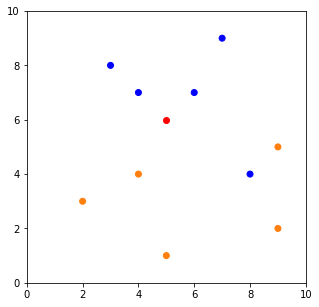

In [ ]:
# Code for 1.1
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))  
plt.xlim(0, 10)
plt.ylim(0, 10)
# DO NOT CHANGE ANYTHING ABOVE. FILL IN YOUR CODE BELOW.
colors = ['tab:orange','blue'] #considering colorsfor data points
plt.scatter(data['x'],data['y'], c=class_labels, cmap=matplotlib.colors.ListedColormap(colors))
label = ['red']
plt.scatter(x=5,y=6,c=label, cmap=matplotlib.colors.ListedColormap(colors))

# DO NOT CHANGE ANYTHING BELOW. FILL IN YOUR CODE ABOVE.
plt.show()

 **(1.2)** - Write a piece of code to compute the Euclidean distance between the new data point `[5,6]` and all 10 points in the dataset. Save the distances in a list named `distances`. Note that you are required to implement the Euclidean distance function, and you are not allowed to use any existing implementation of it in any Python library. 
 
The code block below already provides the first line and the last several lines, in order to print out the values in the list `distances`. You are supposed to fill in your code inside the block. Your output should be essentially the same as the output under the code block below. 

(10 points)

In [ ]:
# Code for 1.2
import numpy as np 
# DO NOT CHANGE ANYTHING ABOVE. FILL IN YOUR CODE BELOW.
def Euclidian_distance(x1,y1): #function which calculates the euclidina distance using the formula
    return (((5-x1)**2) + ((6-y1)**2))**0.5

distances=[]
for i in range(0,len(data)):
    distances.append(Euclidian_distance(data['x'][i],data['y'][i])) # adding the distance between the eacah points to list


# DO NOT CHANGE ANYTHING BELOW. FILL IN YOUR CODE ABOVE.
np.set_printoptions(precision=3)
print(np.array(distances))

[5.657 4.243 2.828 2.236 5.    1.414 3.606 3.606 4.123 1.414]


**(1.3)** - Using the 10-point dataset, find the class label for the new data point `[5,6]` by applying the idea of 3-nearest neighbor classification. Save its class label in a variable `class_label`. Judging by the plot from (1.1), you can tell this point should be classified as blue, i.e., class 2. 

Note that you are required to implement 3-nearest neighbor classification for `[5,6]`, instead of calling any existing implementation. 

The code block below already provides the first line and the last line. The first line is to hard-code the content of `distances` so that you can successfully work on this task even if you couldn't manage to accomplish (1.2). The last line prints out the class label of the new data point. Your output should be the same.

(12 points)

In [ ]:
# Code for 1.3
distances = [5.657, 4.243, 2.828, 2.236, 5, 1.414, 3.606, 3.606, 4.123, 1.414]
# DO NOT CHANGE ANYTHING ABOVE. FILL IN YOUR CODE BELOW.
data = pd.DataFrame(distances,columns=['distances']) #creating the dataframe for distances
data['class_labels'] = class_labels # adding the class lables to the created dataframe
data.sort_values(by=['distances'],inplace=True) #sorting the distance from Descending order so we can easily classify with respect to number of neighbours
data_1 = data.head(3) #since we need apply 3 nearest neighbours,i have taken first 3 shortest distance
class_label =data_1['class_labels'].value_counts().idxmax() #which class rhas majority,given point should be in that class


# DO NOT CHANGE ANYTHING BELOW. FILL IN YOUR CODE ABOVE.
print("class label : ", class_label)

class label :  2


## **Task 2: Exploratory Data Analysis (EDA) (24 points)**

**(2.1)** - We will explore a dataset about airplane tickets. This dataset has close to five thousand rows and 7 columns. The dataset is provided as a CSV file `tickets.csv` in this [link](https://drive.google.com/uc?export=download&id=1GKrAzMQnQLsWlIY0e8PttKHmjC7Bb3kh). Fetch this file using `wget` and load it into a pandas `DataFrame` named `tickets`. The code block below provides the first two lines, including using `wget` to fetch the file. (4 points)

In [ ]:
# Code for 2.1
import pandas as pd
!wget -O tickets.csv "https://drive.google.com/uc?export=download&id=1GKrAzMQnQLsWlIY0e8PttKHmjC7Bb3kh"
# DO NOT CHANGE ANYTHING ABOVE. FILL IN YOUR CODE BELOW.
tickets = pd.read_csv("tickets.csv") #reading the inpput data





--2022-03-12 00:54:40--  https://drive.google.com/uc?export=download&id=1GKrAzMQnQLsWlIY0e8PttKHmjC7Bb3kh
Resolving drive.google.com (drive.google.com)... 172.217.9.206, 2607:f8b0:4004:82f::200e
Connecting to drive.google.com (drive.google.com)|172.217.9.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pf7m1f8je0l1qe7mc7c20fvep7efgo4q/1647046425000/15814610165147367942/*/1GKrAzMQnQLsWlIY0e8PttKHmjC7Bb3kh?e=download [following]
--2022-03-12 00:54:40--  https://doc-10-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pf7m1f8je0l1qe7mc7c20fvep7efgo4q/1647046425000/15814610165147367942/*/1GKrAzMQnQLsWlIY0e8PttKHmjC7Bb3kh?e=download
Resolving doc-10-78-docs.googleusercontent.com (doc-10-78-docs.googleusercontent.com)... 142.251.45.97, 2607:f8b0:4004:83f::2001
Connecting to doc-10-78-docs.googleusercontent.com (doc-10-78-docs.googleuserc

Now let's look at the first 20 rows of the data. If your code block for 2.1 was correct, you should see the same output below. 

In [ ]:
tickets.head(20)

,Stops,Website,Booked_on,Destination,Depart_date,Airline,Price
0,5,KupiBilet.ru,2/7/22,YTO,4/30/22,WS,Expensive
1,4,KupiBilet.ru,2/8/22,ECN,2/27/22,DP,Cheap
2,4,KupiBilet.ru,2/5/22,GYE,4/10/22,AV,Expensive
3,4,KupiBilet.ru,2/8/22,YVR,5/11/22,WS,Expensive
4,4,KupiBilet.ru,2/9/22,LIM,5/11/22,AM,Expensive
5,4,KupiBilet.ru,2/8/22,YVR,7/17/22,WS,Expensive
6,4,KupiBilet.ru,2/7/22,YQB,7/1/22,WS,Expensive
7,4,KupiBilet.ru,2/7/22,YVR,6/7/22,WS,Expensive
8,4,KupiBilet.ru,2/5/22,AHB,6/19/22,5W,Expensive
9,4,KupiBilet.ru,2/7/22,YVR,11/1/22,WS,Expensive


Let's gain some basic understanding of the dataset by using `info()`.

In [ ]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4732 entries, 0 to 4731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Stops        4732 non-null   int64 
 1   Website      4732 non-null   object
 2   Booked_on    4732 non-null   object
 3   Destination  4732 non-null   object
 4   Depart_date  4732 non-null   object
 5   Airline      4732 non-null   object
 6   Price        4732 non-null   object
dtypes: int64(1), object(6)
memory usage: 258.9+ KB


**(2.2)** - We will make `Price` the class attribute. Now let's find out all the distinct values in this column. (4 points)

In [ ]:
# Code for 2.2
tickets['Price'].unique() #will get the uniques values 

array(['Expensive', 'Cheap', 'Average'], dtype=object)

**(2.3)** - Show how many data entries there are in each class, i.e., the number of tickets booked in each price range. (4 points)

In [ ]:
# Code for 2.3
tickets['Price'].value_counts() #it helps us to get to know about the sum of values in different class



Cheap        1780
Average      1535
Expensive    1417
Name: Price, dtype: int64

**(2.4)** - Show 3 random data instances (rows) for each class. (4 points)

In [ ]:
# Code for 2.4
df_1 = tickets[tickets['Price'] =='Average'].sample(n=3) #taking a random sample from each classes
df_2 = tickets[tickets['Price'] =='Cheap'].sample(n=3)
df_3 = tickets[tickets['Price'] =='Expensive'].sample(n=3)
data_sample = pd.concat([df_1,df_2,df_3]) #concatinating the 3 dataframes
data_sample



,Stops,Website,Booked_on,Destination,Depart_date,Airline,Price
2469,1,MEGO.travel,2/5/22,EZV,3/7/22,N4,Average
941,2,Kiwi.com,2/8/22,RMI,7/24/22,W9,Average
702,2,Kiwi.com,2/8/22,LEJ,2/14/22,DP,Average
4147,0,OZON,2/7/22,PEE,11/22/22,S7,Cheap
414,2,KupiBilet.ru,2/6/22,BRS,2/9/22,S7,Cheap
1887,1,KupiBilet.ru,2/8/22,EIN,2/16/22,FR,Cheap
3574,1,KupiBilet.ru,2/7/22,ATL,7/17/22,SU,Expensive
1274,2,Kiwi.com,2/2/22,ACC,4/17/22,TP,Expensive
1225,2,KupiBilet.ru,2/8/22,IXC,4/9/22,EY,Expensive


**(2.5)** - Show the **number** of distinct values in each of these columns: `Stops`, `Website`, `Booked_on`, `Destination`, `Depart_date`, and `Airline`. (4 points)

In [ ]:
# Code for 2.5
a=['Stops','Website','Booked_on','Destination','Depart_date','Airline'] #created a new list with required column names
for i in a:
  print(i,":",tickets[i].nunique())


Stops : 6
Website : 56
Booked_on : 8
Destination : 956
Depart_date : 327
Airline : 114


**(2.6)** - Find the earliest and the latest dates in the `Booked_on` column. (4 points)

In [ ]:
# Code for 2.6
print('earliest date :',tickets['Booked_on'].min())
print('latest date :',tickets['Booked_on'].max())

earliest date : 2/2/22
latest date : 2/9/22


## **Task 3: Build and evaluate classification models (48 points)**

In this task, we use the Python `scikit-learn` library to build a kNN classifier on the air ticket dataset. The classifier predicts whether the price of a ticket is cheap, average, or expensive. Note that these are the three distinct values in column `Price`. 


The air ticket dataset has several categorical attributes. In `scikit-learn`, there are limited ways of building models that directly work with catagorical attributes. Oftentimes we need to preprocess such attributes before we can build and evaluate models. More specifically, we need to encode such attributes in numeric values.

**(3.1)** **- Nominal attributes**

Based on what we learned earlier in this semester, the columns `Destination`, `Airline`, and `Website` are nominal attributes, as there isn't a meaningful order among the attribute values. Write a piece of code to transform these three attributes into numerical attributes using *label encoding*. More specifically, assign one distinct integer for each distinct value in such an attribute. Use `preprocessing.LabelEncoder()` from the `sklearn` library. See a few examples in this [link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). 

Fill in your code in the code block below. If your code is correct, the last line `tickets.head(5)` should return similar output under the code block. 

(4 points)

In [ ]:
# Code for 3.1
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

tickets['Airline'] = label_encoder.fit_transform(tickets['Airline'])
# DO NOT CHANGE ANYTHING ABOVE. FILL IN YOUR CODE BELOW.
tickets['Destination'] = label_encoder.fit_transform(tickets['Destination'])
tickets['Website'] = label_encoder.fit_transform(tickets['Website'])



# DO NOT CHANGE ANYTHING BELOW. FILL IN YOUR CODE ABOVE.
tickets.head(5) 

,Stops,Website,Booked_on,Destination,Depart_date,Airline,Price
0,5,23,2/7/22,942,4/30/22,106,Expensive
1,4,23,2/8/22,242,2/27/22,27,Cheap
2,4,23,2/5/22,321,4/10/22,17,Expensive
3,4,23,2/8/22,943,5/11/22,106,Expensive
4,4,23,2/9/22,485,5/11/22,15,Expensive


**(3.2)** - Now, let's convert the values in columns `Booked_on` and `Depart_date` from string to `datetime` (https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).  (4 points)

In [ ]:
# Code for 3.2
tickets['Booked_on'] =  pd.to_datetime(tickets['Booked_on']) #converting it to datetime format
tickets['Depart_date'] =  pd.to_datetime(tickets['Depart_date'])



**(3.3) Dates** 

Let's create separate columns for months and days---new columns `Booked_month` and `Booked_day` to replace `Booked_on`, and similarly new columns `Depart_month` and `Depart_day` to replace `Depart_date`. For example, given a row with value `2/7/22` in column `Booked_on`, it should have value `2` in column `Booked_month` and ‍‌v‍‌a‍‌l‍‌u‍‌e‍‌ ‍‌`‍‌7‍‌` in `Booked_day`. We do not need new columns for years, since all rows are tickets in 2022. 

Note that in (3.2) we converted `Booked_on` and `Depart_date` into type `datatime`. Check out this page to find out how to fetch the month and the day in a value of type `datatime`: https://docs.python.org/3/library/datetime.html#datetime.date.month.

(4 points)

In [ ]:
# Code for 3.3
tickets['Booked_month'] = tickets['Booked_on'].dt.month #creating a new columns 
tickets['Booked_day'] = tickets['Booked_on'].dt.day
tickets['Depart_month'] = tickets['Depart_date'].dt.month
tickets['Depart_day'] = tickets['Depart_date'].dt.day



**(3.4)** - Remove columns `Booked_on` and `Depart_date` from the `DataFrame` `tickets`. We only need to use the 4 newly created columns from (3.3). (4 points)

In [ ]:
# Code for 3.4
tickets.drop(['Booked_on','Depart_date'],axis=1,inplace=True) #dropping the 'Booked_on'and 'Depart_date' columns


# DO NOT CHANGE ANYTHING BELOW. FILL IN YOUR CODE ABOVE.
tickets.head(5)

,Stops,Website,Destination,Airline,Price,Booked_month,Booked_day,Depart_month,Depart_day
0,5,23,942,106,Expensive,2,7,4,30
1,4,23,242,27,Cheap,2,8,2,27
2,4,23,321,17,Expensive,2,5,4,10
3,4,23,943,106,Expensive,2,8,5,11
4,4,23,485,15,Expensive,2,9,5,11


**(3.5)** - Separate the class labels from the features. The features should be in a `DataFrame` `tickets_feature` and the class labels should be in a `Series` (one column) `tickets_class`. Refer to the expected output under the code block below. The [instructional Colab on Linear Model](https://colab.research.google.com/drive/18hXzJCPuLa6bLxIA2BuCD20w8EOnuKM7?usp=sharing) has some example of this. (6 points)

In [ ]:
pd.set_option('display.max_columns', 10)

In [ ]:
# Code for 3.5
tickets_feature = tickets.drop(['Price'],axis=1) #dataframe which contains input data
tickets_class = tickets['Price'] 


# DO NOT CHANGE ANYTHING BELOW. FILL IN YOUR CODE ABOVE.
print("The first five rows of tickets_feature: ")
print()
print( tickets_feature.head(5))
print("The first five rows of tickets_class: ")
print()
print( tickets_class.head(5))

The first five rows of tickets_feature: 

   Stops  Website  Destination  Airline  Booked_month  Booked_day  \
0      5       23          942      106             2           7   
1      4       23          242       27             2           8   
2      4       23          321       17             2           5   
3      4       23          943      106             2           8   
4      4       23          485       15             2           9   

   Depart_month  Depart_day  
0             4          30  
1             2          27  
2             4          10  
3             5          11  
4             5          11  
The first five rows of tickets_class: 

0    Expensive
1        Cheap
2    Expensive
3    Expensive
4    Expensive
Name: Price, dtype: object


**(3.6)** - Partition your dataset into training and test and use stratified sampling. Use 80% of the data for tarining and 20% for test. (6 points)

In [ ]:
# Code for 3.6
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tickets_feature,tickets_class,test_size=0.2,stratify=tickets_class,random_state=12)



**(3.7)** - Create a 3-nearest neighbor model and train your model. (6 points)

In [ ]:
# Code for 3.7
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

**(3.8)** - Evaluate your model using the test set. Produce the model's accruacy, confusion matrix, and classification report, as shown in the output below. (6 points)

In [ ]:
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
print("Test set accuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:")
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))

print("\nClassification report:")
print(classification_report(y_test,y_pred))

Test set accuracy: 0.5755015839493136

Confusion Matrix:
Predicted  Average  Cheap  Expensive  All
True                                     
Average        173     89         45  307
Cheap          106    215         35  356
Expensive       78     49        157  284
All            357    353        237  947

Classification report:
              precision    recall  f1-score   support

     Average       0.48      0.56      0.52       307
       Cheap       0.61      0.60      0.61       356
   Expensive       0.66      0.55      0.60       284

    accuracy                           0.58       947
   macro avg       0.59      0.57      0.58       947
weighted avg       0.58      0.58      0.58       947



**(3.9)** - Let's fetch a new data file `newData.csv`. It has 10 data instances. Create a `DataFrame` named `new_data` using this data file. (4 points) 

In [ ]:
# Code for 3.9
!wget -O newData.csv "https://drive.google.com/uc?export=download&id=1sDdj_FV5yXX0uSBWfzayCpwDdBjqaNtG"
# DO NOT CHANGE ANYTHING ABOVE. FILL IN YOUR CODE BELOW.
new_data = pd.read_csv("newData.csv")




--2022-03-12 00:54:40--  https://drive.google.com/uc?export=download&id=1sDdj_FV5yXX0uSBWfzayCpwDdBjqaNtG
Resolving drive.google.com (drive.google.com)... 142.250.81.206, 2607:f8b0:4004:82f::200e
Connecting to drive.google.com (drive.google.com)|142.250.81.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v3k91stqgbj2tovubarlmm2kgqti6dbi/1647046425000/15814610165147367942/*/1sDdj_FV5yXX0uSBWfzayCpwDdBjqaNtG?e=download [following]
--2022-03-12 00:54:41--  https://doc-14-78-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v3k91stqgbj2tovubarlmm2kgqti6dbi/1647046425000/15814610165147367942/*/1sDdj_FV5yXX0uSBWfzayCpwDdBjqaNtG?e=download
Resolving doc-14-78-docs.googleusercontent.com (doc-14-78-docs.googleusercontent.com)... 142.251.45.97, 2607:f8b0:4004:83f::2001
Connecting to doc-14-78-docs.googleusercontent.com (doc-14-78-docs.googleuse

**(3.10)** - Apply your 3NN model on the new data points in `new data` and report the output class labels which shall be stored in `prediction`. Refer to the example output below. (4 points)

In [ ]:
# Code for 3.10
prediction = knn.predict(new_data)



# DO NOT CHANGE ANYTHING BELOW. FILL IN YOUR CODE ABOVE.
print("Class labels for the 10 new data points: ", prediction)

Class labels for the 10 new data points:  ['Average' 'Cheap' 'Expensive' 'Expensive' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Average']
